In [1]:
import pandas
import numpy as np

# Data Preparation

In [2]:
trainDataFile = 'ijcnlp_dailydialog/train/dialogues_train.txt'
trainLabelsFile = 'ijcnlp_dailydialog/train/dialogues_act_train.txt' 

In [3]:
testDataFile = 'ijcnlp_dailydialog/validation/dialogues_validation.txt'
testLablesFile = 'ijcnlp_dailydialog/validation/dialogues_act_validation.txt'

In [4]:
lineSeparator = '__eou__'

In [5]:
def getData(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()    
    
    inputs = []
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.extend(line[:-1])
    
    acts = []
    for label in labels:
        label = label.rstrip()
        label = label.split()
        acts.extend(label)
        
    return (inputs, acts)

In [6]:
with open(trainDataFile) as f:
    lines = f.readlines()

In [7]:
with open(trainLabelsFile) as f:
    labels = f.readlines()

In [8]:
len(labels)

11118

In [4]:
len(lines)

11118

In [5]:
lines[0]

"Say , Jim , how about going for a few beers after dinner ? __eou__ You know that is tempting but is really not good for our fitness . __eou__ What do you mean ? It will help us to relax . __eou__ Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? __eou__ I guess you are right.But what shall we do ? I don't feel like sitting at home . __eou__ I suggest a walk over to the gym where we can play singsong and meet some of our friends . __eou__ That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . __eou__ Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . __eou__ Good.Let ' s go now . __eou__ All right . __eou__\n"

In [8]:
labels[0]

'3 4 2 2 2 3 4 1 3 4 \n'

In [11]:
lines[0].count('__eou__')

10

In [28]:
inputs = []
for line in lines:
    line = line.rstrip()
    line = line.split(lineSeparator)
    inputs.extend(line[:-1])

In [29]:
inputs[-4:]

[' Take a look at the ones on display , please . ',
 ' I need size 41 . ',
 'Could I have the check , please ? ',
 " Okay . I'll just be a minute . "]

In [30]:
acts = []
for label in labels:
    label = label.rstrip()
    label = label.split()
    acts.extend(label)

In [31]:
len(inputs)

87170

In [32]:
len(acts)

87170

In [9]:
class Data: pass

In [10]:
dialogues = Data()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
count_vect = CountVectorizer()

In [14]:
trainX, trainY = getData(trainDataFile, trainLabelsFile)

In [15]:
trainX = count_vect.fit_transform(trainX)

In [16]:
valX, valY = getData(testDataFile, testLablesFile)

In [17]:
valX = count_vect.transform(valX)

# Train a classifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(n_jobs=-1)

In [32]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier(n_estimators=100)

In [38]:
model.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Evaluation

In [22]:
from sklearn import metrics

In [45]:
preds = model.predict(valX)

In [46]:
probs = model.predict_proba(valX)

In [39]:
metrics.accuracy_score(valY, model.predict(valX))

0.7314413186268435

In [40]:
metrics.accuracy_score(trainY, model.predict(trainX))

0.9690604565790983

In [62]:
print(metrics.classification_report(valY, model.predict(valX)))

             precision    recall  f1-score   support

          1       0.67      0.87      0.76      3125
          2       0.83      0.85      0.84      2244
          3       0.78      0.54      0.64      1775
          4       0.65      0.34      0.44       925

avg / total       0.74      0.73      0.72      8069



In [47]:
cmat = metrics.confusion_matrix(valY, model.predict(valX))

In [48]:
cmat.diagonal()/cmat.sum(axis=1)

array([0.87136   , 0.85026738, 0.54084507, 0.33621622])

In [49]:
cmat

array([[2723,  158,  136,  108],
       [ 248, 1908,   76,   12],
       [ 585,  186,  960,   44],
       [ 516,   46,   52,  311]])

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import itertools

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
classes = ['inform', 'question', 'directive', 'commisive']

Confusion matrix, without normalization
[[2723  158  136  108]
 [ 248 1908   76   12]
 [ 585  186  960   44]
 [ 516   46   52  311]]


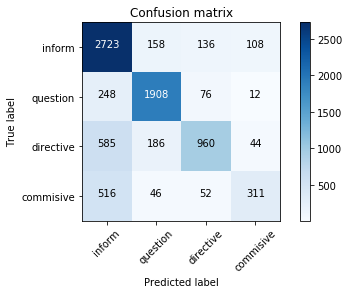

In [59]:
plot_confusion_matrix(cmat, classes)

Normalized confusion matrix
[[0.87136    0.05056    0.04352    0.03456   ]
 [0.11051693 0.85026738 0.03386809 0.00534759]
 [0.32957746 0.10478873 0.54084507 0.02478873]
 [0.55783784 0.04972973 0.05621622 0.33621622]]


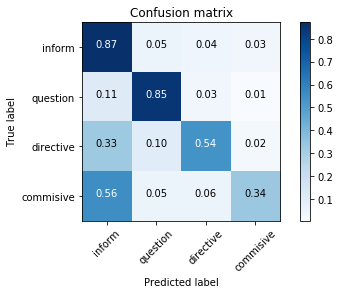

In [60]:
plot_confusion_matrix(cmat, classes, normalize=True)

In [66]:
correctPerClass = {}
totalPerClass   = {}
for cls in ['1','2','3','4']:
    correctPerClass[cls] = 0
    totalPerClass[cls]   = 0
for yt, yp in zip(valY, preds):
    totalPerClass[yt] += 1
    correctPerClass[yt] += int(yt==yp)



In [67]:
totalPerClass

{'1': 3125, '2': 2244, '3': 1775, '4': 925}

In [68]:
correctPerClass

{'1': 2723, '2': 1908, '3': 960, '4': 311}

In [69]:
for cls in ['1','2','3','4']:
    acc = correctPerClass[cls]/totalPerClass[cls]
    print("Accuracy for class ", cls, " :", acc)

Accuracy for class  1  : 0.87136
Accuracy for class  2  : 0.8502673796791443
Accuracy for class  3  : 0.5408450704225352
Accuracy for class  4  : 0.3362162162162162


In [27]:
label

['3', '4']

In [24]:
line

['Could I have the check , please ? ', " Okay . I'll just be a minute . ", '']

In [21]:
line.split(lineSeparator)

['Could I have the check , please ? ', " Okay . I'll just be a minute . ", '']

In [22]:
lines[-1]

"Could I have the check , please ? __eou__ Okay . I'll just be a minute . __eou__\n"